In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
gender_sub = pd.read_csv("titanic/gender_submission.csv")

In [3]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S


In [4]:
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
315,1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
111,1003,3,"Shine, Miss. Ellen Natalia",female,NaN,0,0,330968,7.7792,NaN,Q
291,1183,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.9500,NaN,Q
279,1171,2,"Oxenham, Mr. Percy Thomas",male,22.0,0,0,W./C. 14260,10.5000,NaN,S
313,1205,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
def bool_sex(sex):
    return 1 if sex == 'female' else 0

Vamos criar uma *baseline* fazendo um teste como se todas as mulheres tiveram sobrevivido.

In [6]:
baseline = df_test.copy()
baseline['Survived'] = pd.Series(baseline['Sex'].apply(lambda x: x == 'female').astype(int))
baseline.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,1
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S,1
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S,1
99,991,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,A./5. 3338,8.0500,NaN,S,0
327,1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.2000,NaN,C,0
183,1075,3,"Lane, Mr. Patrick",male,NaN,0,0,7935,7.7500,NaN,Q,0
347,1239,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,1
282,1174,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.7500,NaN,Q,1


### Salvando a baseline em um arquivo csv

In [7]:
baseline.to_csv("results/baseline.csv", columns=['PassengerId', 'Survived'], index=None)

In [8]:
!head -n10 results/baseline.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


* Baseline Kaggle Score: 0.76555

## Iniciando desenvolvimento do modelo

Primeiro vamos analisar a distribuição dos dados e tentar preencher os que faltam.

Verificando se existe alguma correlação entre os dados

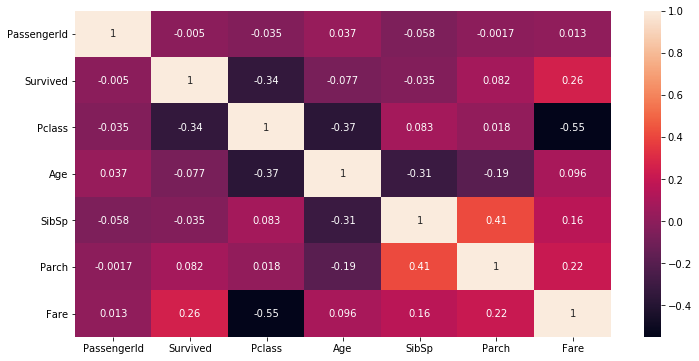

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), annot=True )

De fato existe uma pequena correlação entre sexo e sobrevivência, talves por isso o baseline não foi tão ruim, lembrando que mulheres e crianças tiveram prioridade de salvamento.


Existem algumas informações faltantes no dataframe, vamos tentar preencher de acordo com outros dados, por exemplo, vamos preencher as idades faltantes de acordo com o título dado as pessoas (Mr., Mrs, Miss, etc).

Criando uma função que vai dizer se a pessoa tem um determinado título.

In [10]:
def has_title(title , df):
    df['Tem_'+title] = df['Name'].str.contains(title, regex=False).astype(int)

In [11]:
titulos = df_train['Name'].str.findall(r'\w*\.')
titulo_lista = []
for titulo in titulos:
    titulo_lista.append(titulo[0])

titulo_lista = set(titulo_lista)

In [12]:
for titulo in titulo_lista:
    print(f"{titulo}: {df_train['Name'].str.contains(titulo, regex=False).astype(int).sum()}")
    has_title(titulo, df_train)
    
    


Sir.: 1
Mlle.: 2
Capt.: 1
Mrs.: 125
Col.: 2
Jonkheer.: 1
Don.: 1
Lady.: 1
Major.: 2
Miss.: 182
Dr.: 7
Mme.: 1
Countess.: 1
Ms.: 1
Mr.: 517
Master.: 40
Rev.: 6


In [13]:
list(titulo_lista)

# has_title('Master.', df_train)
# has_title("Mr.", df_train)
# has_title("Mrs.", df_train)
# has_title("Miss.", df_train)
# has_title("Capt.", df_train)
# has_title("Major.", df_train)
# has_title("Countess.", df_train)
# has_title("Col.", df_train)
# has_title("Dr.", df_train)
# df_train.head(3)

['Sir.',
 'Mlle.',
 'Capt.',
 'Mrs.',
 'Col.',
 'Jonkheer.',
 'Don.',
 'Lady.',
 'Major.',
 'Miss.',
 'Dr.',
 'Mme.',
 'Countess.',
 'Ms.',
 'Mr.',
 'Master.',
 'Rev.']

In [14]:
df_train['Tem_Jonkheer.'].sum()

1

Quantos titulos temos no dataframe

In [15]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Tem_Sir.', 'Tem_Mlle.',
       'Tem_Capt.', 'Tem_Mrs.', 'Tem_Col.', 'Tem_Jonkheer.', 'Tem_Don.',
       'Tem_Lady.', 'Tem_Major.', 'Tem_Miss.', 'Tem_Dr.', 'Tem_Mme.',
       'Tem_Countess.', 'Tem_Ms.', 'Tem_Mr.', 'Tem_Master.', 'Tem_Rev.'],
      dtype='object')

In [16]:
df_train[['Tem_Dr.', 'Tem_Lady.',
       'Tem_Ms.', 'Tem_Master.', 'Tem_Mme.', 'Tem_Rev.', 'Tem_Major.',
       'Tem_Mlle.', 'Tem_Jonkheer.', 'Tem_Sir.', 'Tem_Col.', 'Tem_Mr.',
       'Tem_Capt.', 'Tem_Countess.', 'Tem_Mrs.', 'Tem_Miss.', 'Tem_Don.']].sum()

Tem_Dr.            7
Tem_Lady.          1
Tem_Ms.            1
Tem_Master.       40
Tem_Mme.           1
Tem_Rev.           6
Tem_Major.         2
Tem_Mlle.          2
Tem_Jonkheer.      1
Tem_Sir.           1
Tem_Col.           2
Tem_Mr.          517
Tem_Capt.          1
Tem_Countess.      1
Tem_Mrs.         125
Tem_Miss.        182
Tem_Don.           1
dtype: int64

Verificando os titulos pertencentes as pessoas que tem idade nula

In [17]:
df_train[df_train['Age'].isnull()][['Tem_Dr.', 'Tem_Lady.',
       'Tem_Ms.', 'Tem_Master.', 'Tem_Mme.', 'Tem_Rev.', 'Tem_Major.',
       'Tem_Mlle.', 'Tem_Jonkheer.', 'Tem_Sir.', 'Tem_Col.', 'Tem_Mr.',
       'Tem_Capt.', 'Tem_Countess.', 'Tem_Mrs.', 'Tem_Miss.', 'Tem_Don.']].sum()

Tem_Dr.            1
Tem_Lady.          0
Tem_Ms.            0
Tem_Master.        4
Tem_Mme.           0
Tem_Rev.           0
Tem_Major.         0
Tem_Mlle.          0
Tem_Jonkheer.      0
Tem_Sir.           0
Tem_Col.           0
Tem_Mr.          119
Tem_Capt.          0
Tem_Countess.      0
Tem_Mrs.          17
Tem_Miss.         36
Tem_Don.           0
dtype: int64

In [18]:
def get_age(title, df):
    """Retorna a média da idade de acordo com o titulo"""
    return df[df[title] == 1]['Age'].mean()

In [19]:
def set_age(title, df):
    """Seta idade nos campos faltantes"""
    df.loc[ (df[title] == 1) & (df['Age'].isnull()), 'Age'] = get_age(title, df)

In [20]:
titulo_lista = ['Tem_Dr.', 'Tem_Lady.',
       'Tem_Ms.', 'Tem_Master.', 'Tem_Mme.', 'Tem_Rev.', 'Tem_Major.',
       'Tem_Mlle.', 'Tem_Jonkheer.', 'Tem_Sir.', 'Tem_Col.', 'Tem_Mr.',
       'Tem_Capt.', 'Tem_Countess.', 'Tem_Mrs.', 'Tem_Miss.', 'Tem_Don.']
for titulo in titulo_lista:
    set_age(titulo, df_train)


Confirmando que não temos mais idades com valor nulo

In [21]:
df_train[df_train['Age'].isnull()][titulo_lista].sum()

Tem_Dr.          0
Tem_Lady.        0
Tem_Ms.          0
Tem_Master.      0
Tem_Mme.         0
Tem_Rev.         0
Tem_Major.       0
Tem_Mlle.        0
Tem_Jonkheer.    0
Tem_Sir.         0
Tem_Col.         0
Tem_Mr.          0
Tem_Capt.        0
Tem_Countess.    0
Tem_Mrs.         0
Tem_Miss.        0
Tem_Don.         0
dtype: int64

O modelo lê apenas valores numéricos, por este motivo vamos criar algumas novas colunas como sex_boolean para informar se a pessoa é sexo masculino (0) ou feminino (1) bem como para saber o local de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Também vamos verificar o prefixo da cabine o passageiro.

In [22]:
df_train = pd.get_dummies(df_train, columns=['Embarked', 'Sex'], drop_first=True).rename(columns={"Sex_male": "Sex"})

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Tem_Dr.,Tem_Mme.,Tem_Countess.,Tem_Ms.,Tem_Mr.,Tem_Master.,Tem_Rev.,Embarked_Q,Embarked_S,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,1,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,1,0,0,0,1,1


In [24]:
# Removendo dados que não serão utilizados
# del df_train['Cabin']

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Tem_Dr.,Tem_Mme.,Tem_Countess.,Tem_Ms.,Tem_Mr.,Tem_Master.,Tem_Rev.,Embarked_Q,Embarked_S,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,1,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,1,0,0,0,1,1


### Analisando os dados

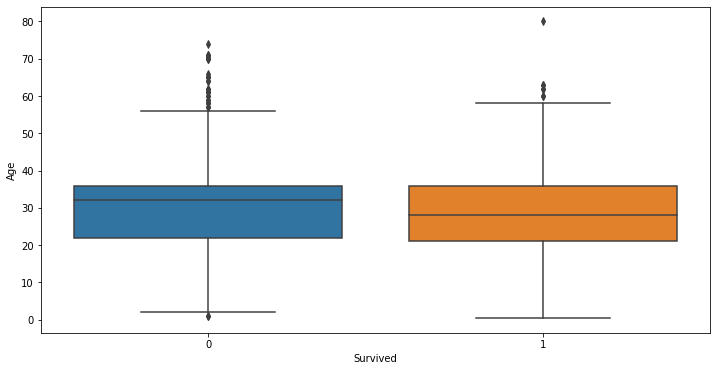

In [26]:
# Distribuição da idade entre pessoas que sobreviveram e que não sobreviveram
plt.figure(figsize=(12,6))
sns.boxplot(y='Age', x="Survived", data=df_train)

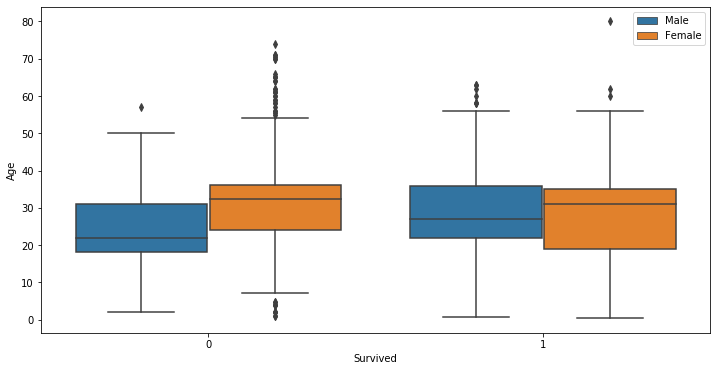

In [27]:
# Distribuição da idade e sexo entre pessoas que sobreviveram e que não sobreviveram
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='Age', x="Survived", hue="Sex", data=df_train)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"])
plt.show()

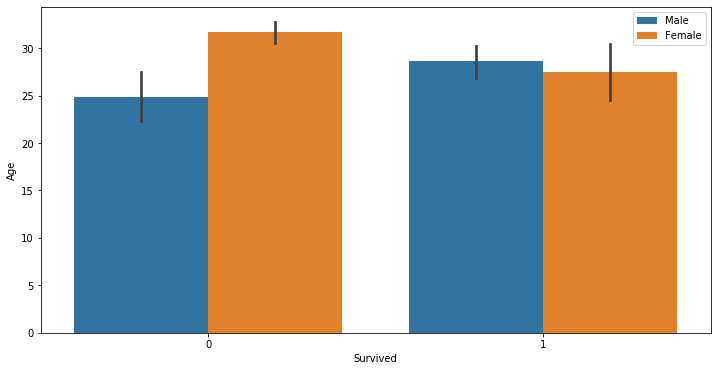

In [28]:
# Média de idade de sobreviventes e mortos separados por sexo
plt.figure(figsize=(12,6))
ax = sns.barplot(y='Age', x="Survived", hue="Sex", data=df_train)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"])
plt.show()

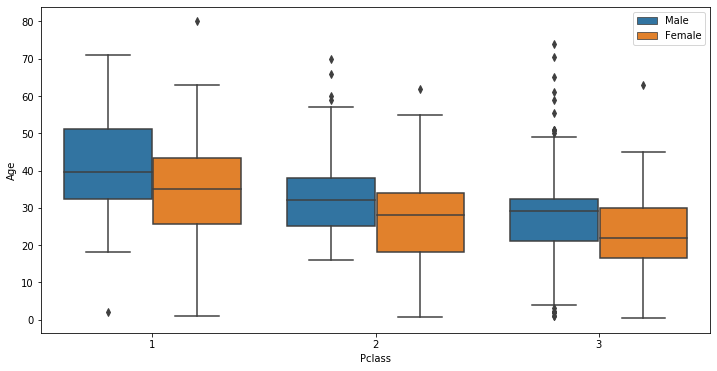

In [29]:
# Distribuição de idade por classe separando por sobreviventes
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='Age', x="Pclass", hue='Survived', data=df_train)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"])
plt.show()

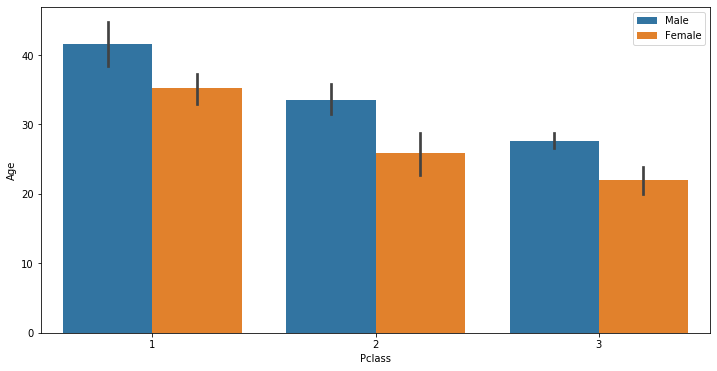

In [30]:
# Sobreviventes por classe
plt.figure(figsize=(12,6))
ax = sns.barplot(y='Age', x="Pclass", hue='Survived', data=df_train)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"])
plt.show()

Somando as colunas SibSp e Parch para ter uma ideia melhor de quantas pessoas viajaram juntas

In [31]:
df_train['qtd_relatives'] = df_train['SibSp'] + df_train['Parch']

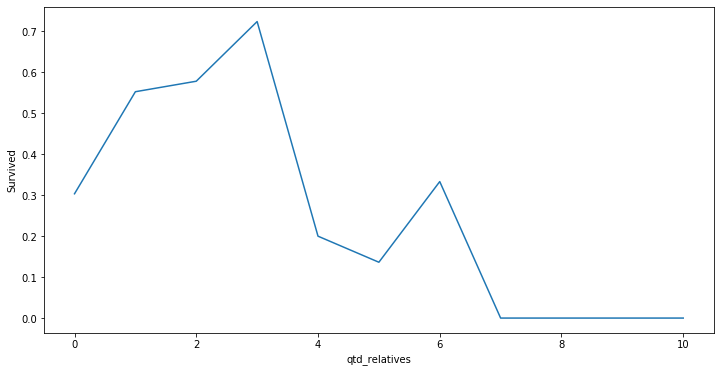

In [32]:
# Indice de sobrevivencia por quantidade de parentes viajando junto
plt.figure(figsize=(12,6))
sns.lineplot(x='qtd_relatives', y="Survived", data=df_train, ci=None)

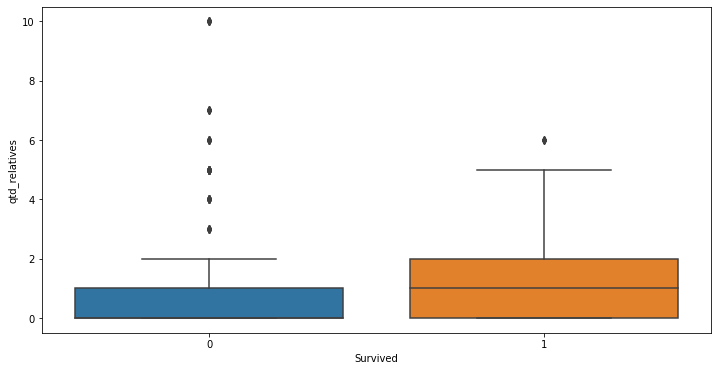

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(y='qtd_relatives', x="Survived", data=df_train)

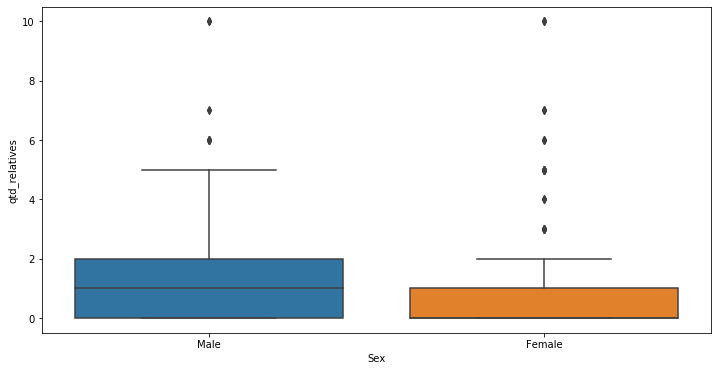

In [34]:
# Verificando a quantidade de parentes que viajaram com homens e mulheres
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='qtd_relatives', x="Sex", data=df_train)
ax.set_xticklabels(['Male', "Female"])

plt.show()

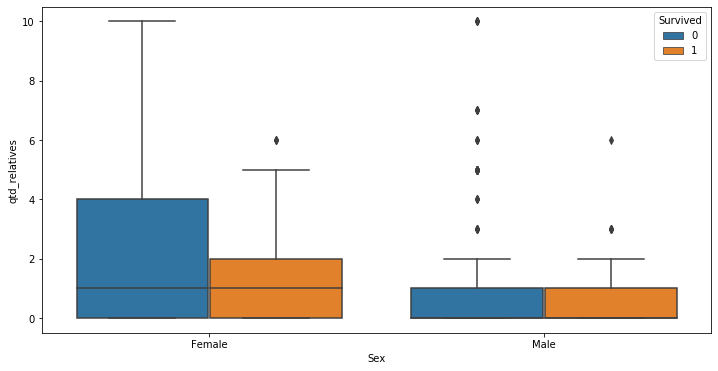

In [35]:
# Morte por quantidade de parente
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='qtd_relatives', x="Sex", hue='Survived', data=df_train)
ax.set_xticklabels(["Female", "Male"])

plt.show()

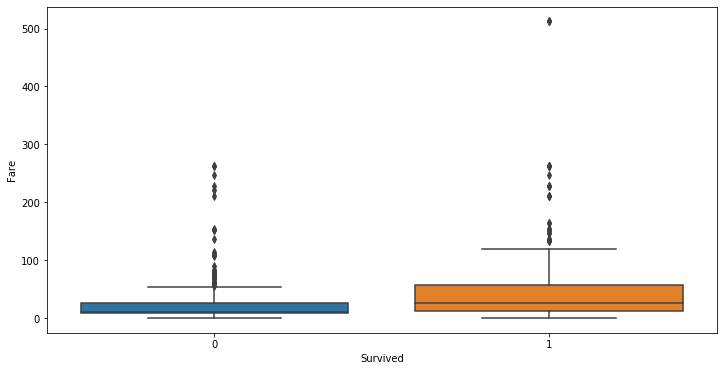

In [36]:
# Distribuição de preço por sobreviventes
plt.figure(figsize=(12,6))
sns.boxplot(y='Fare', x="Survived", data=df_train)

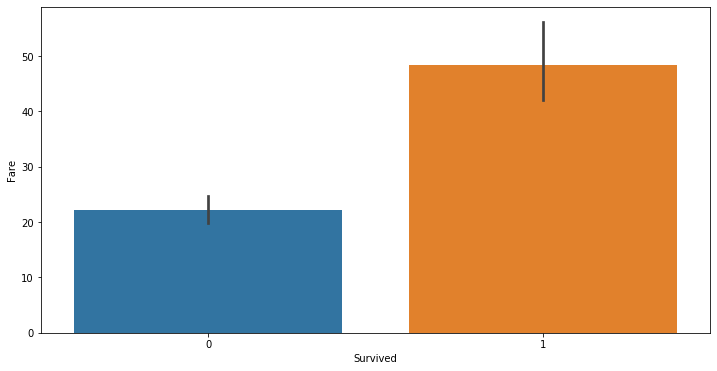

In [37]:
# Média de preço por sobreviventes
plt.figure(figsize=(12,6))
sns.barplot(y='Fare', x="Survived", data=df_train)

Separando entre treino e teste

In [38]:
df_train = pd.get_dummies(df_train, columns=['Pclass'])

Separando pelo quantile das passagens

In [39]:
df_train['p_25'] = (df_train[['Fare']] <= df_train[['Fare']].quantile(0.25)).astype(int)
df_train['p_50'] = ((df_train[['Fare']] > df_train[['Fare']].quantile(0.25)) & (df_train[['Fare']] <= df_train[['Fare']].quantile(0.50))).astype(int)
df_train['p_75'] = ((df_train[['Fare']] > df_train[['Fare']].quantile(0.50)) & (df_train[['Fare']] <= df_train[['Fare']].quantile(0.75))).astype(int)
df_train['p_maior_75'] = (df_train[['Fare']] > df_train[['Fare']].quantile(0.75)).astype(int)

In [40]:
df_train.dtypes

PassengerId        int64
Survived           int64
Name              object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Tem_Sir.           int64
Tem_Mlle.          int64
Tem_Capt.          int64
Tem_Mrs.           int64
Tem_Col.           int64
Tem_Jonkheer.      int64
Tem_Don.           int64
Tem_Lady.          int64
Tem_Major.         int64
Tem_Miss.          int64
Tem_Dr.            int64
Tem_Mme.           int64
Tem_Countess.      int64
Tem_Ms.            int64
Tem_Mr.            int64
Tem_Master.        int64
Tem_Rev.           int64
Embarked_Q         uint8
Embarked_S         uint8
Sex                uint8
qtd_relatives      int64
Pclass_1           uint8
Pclass_2           uint8
Pclass_3           uint8
p_25               int64
p_50               int64
p_75               int64
p_maior_75         int64
dtype: object

In [41]:
df_train['Age'] = df_train['Age'].astype(int) 
df_train['Age_5'] = (df_train['Age'] <= 5).astype(int)
df_train['Age_5_10'] = ((df_train['Age'] > 5) & (df_train['Age'] <= 10)).astype(int)
df_train['Age_10_20'] = ((df_train['Age'] > 10) & (df_train['Age'] <= 20)).astype(int)
df_train['Age_20_30'] = ((df_train['Age'] > 20) & (df_train['Age'] <= 30)).astype(int)
df_train['Age_30_40'] = ((df_train['Age'] > 30) & (df_train['Age'] <= 40)).astype(int)
df_train['Age_40_50'] = ((df_train['Age'] > 40) & (df_train['Age'] <= 50)).astype(int)
df_train['Age_50'] = (df_train['Age'] > 50).astype(int)

In [42]:
df_train.columns.to_list()

['PassengerId',
 'Survived',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Tem_Sir.',
 'Tem_Mlle.',
 'Tem_Capt.',
 'Tem_Mrs.',
 'Tem_Col.',
 'Tem_Jonkheer.',
 'Tem_Don.',
 'Tem_Lady.',
 'Tem_Major.',
 'Tem_Miss.',
 'Tem_Dr.',
 'Tem_Mme.',
 'Tem_Countess.',
 'Tem_Ms.',
 'Tem_Mr.',
 'Tem_Master.',
 'Tem_Rev.',
 'Embarked_Q',
 'Embarked_S',
 'Sex',
 'qtd_relatives',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'p_25',
 'p_50',
 'p_75',
 'p_maior_75',
 'Age_5',
 'Age_5_10',
 'Age_10_20',
 'Age_20_30',
 'Age_30_40',
 'Age_40_50',
 'Age_50']

In [43]:
df_train[titulo_lista].sum().sort_values(ascending=False)

Tem_Mr.          517
Tem_Miss.        182
Tem_Mrs.         125
Tem_Master.       40
Tem_Dr.            7
Tem_Rev.           6
Tem_Col.           2
Tem_Mlle.          2
Tem_Major.         2
Tem_Mme.           1
Tem_Lady.          1
Tem_Ms.            1
Tem_Don.           1
Tem_Sir.           1
Tem_Capt.          1
Tem_Countess.      1
Tem_Jonkheer.      1
dtype: int64

In [44]:
X_vars = ['Pclass_1', 'Pclass_2', 'Pclass_3', 
              'Age', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S', 
              'qtd_relatives', 'p_25', 'p_50', 'p_75', 'p_maior_75', 'Tem_Master.',
                 'Tem_Mr.', 'Tem_Mrs.', 'Tem_Miss.', 'Tem_Capt.', 'Tem_Major.',
                  'Tem_Countess.', 'Tem_Col.', 'Tem_Dr.', 'Age_5',
 'Age_5_10',
 'Age_10_20',
 'Age_20_30',
 'Age_30_40',
 'Age_40_50',
 'Age_50']

In [45]:
X = df_train[X_vars]
y = df_train['Survived']
print(X.shape[0], y.shape[0])

891 891


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

712 179 712 179


# Treinando modelo

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [48]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
predict = modelo.predict(X_test)
predict_proba = modelo.predict_proba(X_test)
threshold = 0.88
predict= (predict_proba[:,1] >= threshold).astype('int')


accuracy = metrics.accuracy_score(y_test, predict)
print(round(accuracy,4,)*100, "%")
print(metrics.classification_report(y_test, predict))
print()

77.64999999999999 %
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       105
           1       0.89      0.53      0.66        74

    accuracy                           0.78       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.78      0.76       179




In [73]:
print(metrics.confusion_matrix(y_test, predict))

[[100   5]
 [ 35  39]]


In [74]:
print(metrics.precision_score(y_test, predict).round(2))

0.89


Verificando probabilidade de morte e valor predito

In [76]:
resultado = pd.DataFrame()
resultado['y_true'] = y_test
resultado['y_proba_death'] = predict_proba[:,0]
resultado['y_predict'] = predict
proba = 0.50
# resultado[resultado['y_proba_death'] > proba].sample(10)
resultado.sample(10)

,y_true,y_proba_death,y_predict
485,0,0.980,0
652,0,0.950,0
594,0,0.980,0
306,1,0.000,1
493,0,0.780,0
299,1,0.040,1
529,0,0.960,0
33,0,0.425,0
785,0,0.930,0
422,0,0.940,0


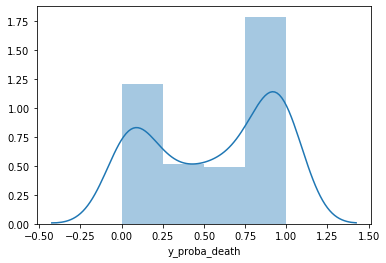

In [53]:
sns.distplot(resultado['y_proba_death'])

O Modelo de treino tivemos uma taxa de acerto de 82%.

Próximo passo é carregar o dataFrame de teste, fazer a as modificações, rodar o predict e dar submit no kaggle.

In [54]:
# Criando as colunas de titulo
has_title('Master.', df_test)
has_title("Mr.", df_test)
has_title("Mrs.", df_test)
has_title("Miss.", df_test)
has_title("Capt.", df_test)
has_title("Major.", df_test)
has_title("Countess.", df_test)
has_title("Col.", df_test)
has_title("Dr.", df_test)
has_title("Ms.", df_test)
# Alterandos os campos com idade nula
set_age('Tem_Master.', df_test)
set_age('Tem_Mr.', df_test)
set_age('Tem_Miss.', df_test)
set_age('Tem_Mrs.', df_test)
set_age('Tem_Dr.', df_test)
set_age("Tem_Capt.", df_test)
set_age("Tem_Major.", df_test)
set_age("Tem_Countess.", df_test)
set_age("Tem_Col.", df_test)
set_age("Tem_Ms.", df_test)
#Binarizando coluna Sex e Embarked
df_test = pd.get_dummies(df_test, columns=['Embarked', 'Sex', 'Pclass']).rename(columns={"Sex_male": "Sex"})

df_test['qtd_relatives'] = df_test['SibSp'] + df_test['Parch']
df_test.loc[df_test["Tem_Ms."] == 1, 'Age'] = int(df_test["Age"].mean())
df_test.loc[df_test['Fare'].isna(), 'Fare'] = df_test['Fare'].median()

df_test['p_25'] = (df_test[['Fare']] <= df_test[['Fare']].quantile(0.25)).astype(int)
df_test['p_50'] = ((df_test[['Fare']] > df_test[['Fare']].quantile(0.25)) & (df_test[['Fare']] <= df_test[['Fare']].quantile(0.50))).astype(int)
df_test['p_75'] = ((df_test[['Fare']] > df_test[['Fare']].quantile(0.50)) & (df_test[['Fare']] <= df_test[['Fare']].quantile(0.75))).astype(int)
df_test['p_maior_75'] = (df_test[['Fare']] > df_test[['Fare']].quantile(0.75)).astype(int)

df_test['Age'] = df_test['Age'].astype(int) 
df_test['Age_5'] = (df_test['Age'] <= 5).astype(int)
df_test['Age_5_10'] = ((df_test['Age'] > 5) & (df_test['Age'] <= 10)).astype(int)
df_test['Age_10_20'] = ((df_test['Age'] > 10) & (df_test['Age'] <= 20)).astype(int)
df_test['Age_20_30'] = ((df_test['Age'] > 20) & (df_test['Age'] <= 30)).astype(int)
df_test['Age_30_40'] = ((df_test['Age'] > 30) & (df_test['Age'] <= 40)).astype(int)
df_test['Age_40_50'] = ((df_test['Age'] > 40) & (df_test['Age'] <= 50)).astype(int)
df_test['Age_50'] = (df_test['Age'] > 50).astype(int)

In [55]:
X_vars

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Age',
 'Fare',
 'Sex',
 'Embarked_Q',
 'Embarked_S',
 'qtd_relatives',
 'p_25',
 'p_50',
 'p_75',
 'p_maior_75',
 'Tem_Master.',
 'Tem_Mr.',
 'Tem_Mrs.',
 'Tem_Miss.',
 'Tem_Capt.',
 'Tem_Major.',
 'Tem_Countess.',
 'Tem_Col.',
 'Tem_Dr.',
 'Age_5',
 'Age_5_10',
 'Age_10_20',
 'Age_20_30',
 'Age_30_40',
 'Age_40_50',
 'Age_50']

In [59]:
# test_predict = modelo.predict(df_test[X_vars])
test_predict_proba = modelo.predict_proba(df_test[X_vars])
threshold = 0.8
predict= (test_predict_proba[:,1] >= threshold).astype('int')

In [60]:
sub = pd.Series(predict, index=df_test['PassengerId'], name='Survived')
sub.to_csv("results/random_forest_threshold_8.csv", header=True)

In [61]:
!head -n10 results/try_logReg.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,0
899,0
900,1


* Score Kaggle: 0.73205 - precisa melhorar
* Score Kaggle com trashold 0.70: 0.75358
* Score Kaggle com trashold 0.80: 0.76076